# Problem Statement Outline
### About the Data
* NPAs (Non Performing Assets) have reached all time high
* It’s stock has fallen by 20% in the previous quarter alone
* Majority of NPA was contributed by loan defaulters.
* along with the bank, the investors perform due diligence on the requested loan application. 


##use machine learning to figure out a way to find these defaulters and devise a plan to reduce them.
##In this challenge, you will help this bank by predicting the probability that a member will default.


* Evaluation based on AUC-ROC score.

In [ ]:
!unzip /content/drive/MyDrive/dataset.zip -d /content/drive/MyDrive/data/

Archive:  /content/drive/MyDrive/dataset.zip
   creating: /content/drive/MyDrive/data/ML_Artivatic_dataset/
  inflating: /content/drive/MyDrive/data/ML_Artivatic_dataset/sample_submission.csv  
  inflating: /content/drive/MyDrive/data/ML_Artivatic_dataset/test_indessa.csv  
  inflating: /content/drive/MyDrive/data/ML_Artivatic_dataset/train_indessa.csv  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#About the Data
* **member_id**  unique ID assigned to each member
* **loan_amnt**	loan amount applied by the member
* **funded_amnt**	loan amout  sanctioned by the bank
* **funded_amnt_inv**	loan amount  sanctioned by the investors
* **term**	term of loan (in months)
* **batch_enrolled**	batch numbers allotted to members
* **int_rate**	interest rate (%) on loan
* **grade**	grade assigned by the bank
* **sub_grade**	grade assigned by the bank
* **emp_title**	job / Employer title of member
* **emp_length**	employment length, where 0 means less than one year and 10 means ten or more years
* **home_ownership**	status of home ownership
* **annual_inc**	annual income ($) reported by the member
* **verification_status**	status of income verified by the bank
* **pymnt_plan**	indicates if any payment plan has started against loan
* **desc**	loan description provided by member
* **purpose**	purpose of loan
* **title**	loan title provided by member
* **zip_code**	first three digits of area zipcode of member

* **addr_state**	living state of member
* **dti**	ratio of member's total monthly debt repayment excluding mortgage divided by self reported monthly income
* **delinq_2yrs**	number of 30+ days delinquency in past 2 years
* **inq_last_6mths**	number of inquiries in last 6 months
* **mths_since_last_delinq**	number of months since last delinq
* **mths_since_last_record**	number of months since last public record
* **open_acc**	number of open credit line in member's credit line
* **pub_rec**	number of derogatory public records
* **revol_bal**	total credit revolving balance
* **revol_util**	amount of credit a member is using relative to revol_bal
* **total_acc**	total number of credit lines available in members credit line
* **initial_list_status**	unique listing status of the loan - W(Waiting), F(Forwarded)
* **total_rec_int**	interest received till date
* **total_rec_late_fee**	Late fee received till date
* **recoveries**	post charge off gross recovery
* **collection_recovery_fee**	post charge off collection fee

* **collections_12_mths_ex_med**	number of collections in last 12 months excluding medical collections
* **mths_since_last_major_derog**	months since most recent 90 day or worse rating
* **application_type**	indicates when the member is an individual or joint
* **verification_status_joint**	indicates if the joint members income was verified by the bank
* **last_week_pay**	indicates how long (in weeks) a member has paid EMI after batch enrolled
* **acc_now_delinq**	number of accounts on which the member is delinquent
* **tot_coll_amt**	total collection amount ever owed
* **tot_cur_bal**	total current balance of all accounts
* **total_rev_hi_lim**	total revolving credit limit
* **loan_status**	status of loan amount, 1 = Defaulter, 0 = Non Defaulters



In [2]:
data=pd.read_csv('/content/drive/MyDrive/data/ML_Artivatic_dataset/train_indessa.csv')
test=pd.read_csv('/content/drive/MyDrive/data/ML_Artivatic_dataset/test_indessa.csv')

In [3]:
print('data',data.shape)
print('test',test.shape)

data (532428, 45)
test (354951, 44)


In [4]:
#finding null values 
data.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [ ]:
test.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  45599
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       20629
emp_length                      17934
home_ownership                      0
annual_inc                          1
verification_status                 0
pymnt_plan                          0
desc                           304770
purpose                             0
title                              62
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        13
inq_last_6mths                     13
mths_since_last_delinq         181758
mths_since_last_record         300021
open_acc                           13
pub_rec     

In [ ]:
data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,82123.000000,532412.000000,532412.000000,5.324280e+05,532141.000000,532412.000000,532428.000000,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,70.093068,11.545594,0.194858,1.692128e+04,55.057189,25.267357,1753.428788,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,28.139219,5.311442,0.583822,2.242322e+04,23.853436,11.843211,2093.199837,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.444000e+03,37.700000,17.000000,441.600000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187600e+04,56.000000,24.000000,1072.690000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.084300e+04,73.600000,32.000000,2234.735000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,121.000000,90.000000,86.000000,2.568995e+06,892.300000,162.000000,24205.620000,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


In [ ]:
data.describe(include=object)

,term,batch_enrolled,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,initial_list_status,application_type,verification_status_joint,last_week_pay
count,532428,447279,532428,532428,501595,505537,532428,532428,532428,75599,532428,532338,532428,532428,532428,532428,305,532428
unique,2,104,7,35,190124,11,6,3,2,70638,14,39693,917,51,2,2,3,98
top,36 months,,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,n,> Debt consolidation<br>,debt_consolidation,Debt consolidation,945xx,CA,f,INDIVIDUAL,Not Verified,13th week
freq,372793,106079,152713,33844,8280,175105,265940,197750,532420,576,314989,248967,5845,77911,274018,532123,170,30333


##Let's get a report of the data.


In [ ]:
!pip install pandas-profiling[notebook,html]
from pandas_profiling import ProfileReport
profile = ProfileReport(train, title='Report0')
profile.to_file('your_report.html')#saves a html page with the overview of the data when running on your local machine.

Let's observe defaulter and try to observe the pattern towards becoming a defaulter.

KeyboardInterrupt: ignored

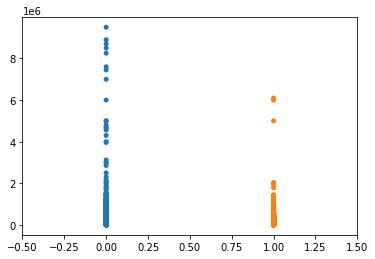

In [ ]:
sns.swarmplot(x=data['loan_status'], y=data['annual_inc'])

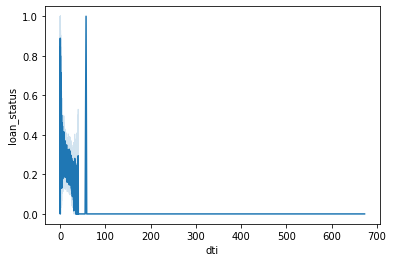

In [5]:
sns.lineplot(x=data['dti'],y=data['loan_status'])

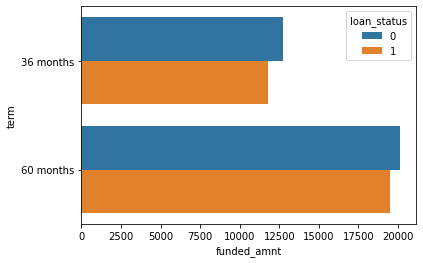

In [ ]:
sns.barplot(x=data['funded_amnt'], y=data['term'],hue=data['loan_status'],ci=None)

**For a larger amount of loan, a longer term of repayment is preferred by clients. But increasing the term or giving a lesser amount makes no big differencce in the person's being defaulter.**

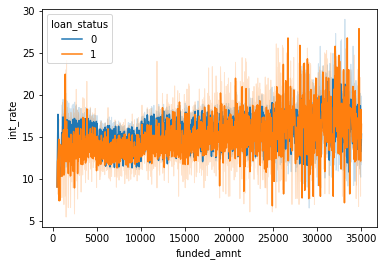

In [ ]:
sns.lineplot(x=data['funded_amnt'], y=data['int_rate'],hue=data['loan_status'])

**For a larger amount of loan and when the interest rate is higher people are more people towards defaultors can be observed.**

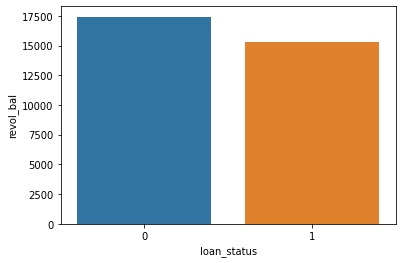

In [ ]:
sns.barplot(x=data['loan_status'], y=data['revol_bal'],ci=None)

**Clients that are regular with their payments have a hight credit revolving balance.**

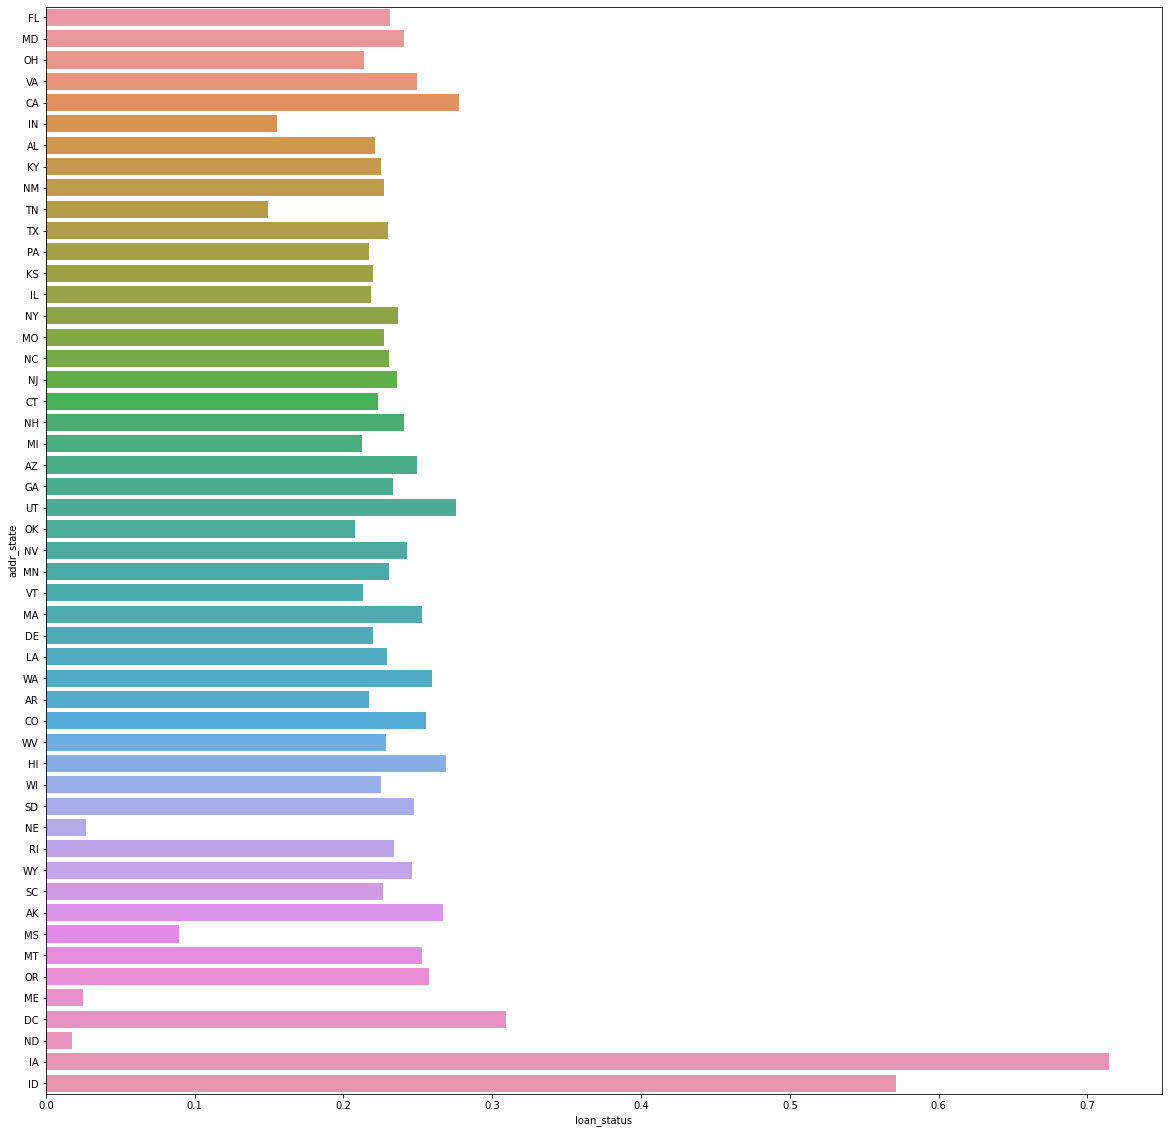

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.barplot(ax=ax,x=data['loan_status'], y=data['addr_state'],ci=None)

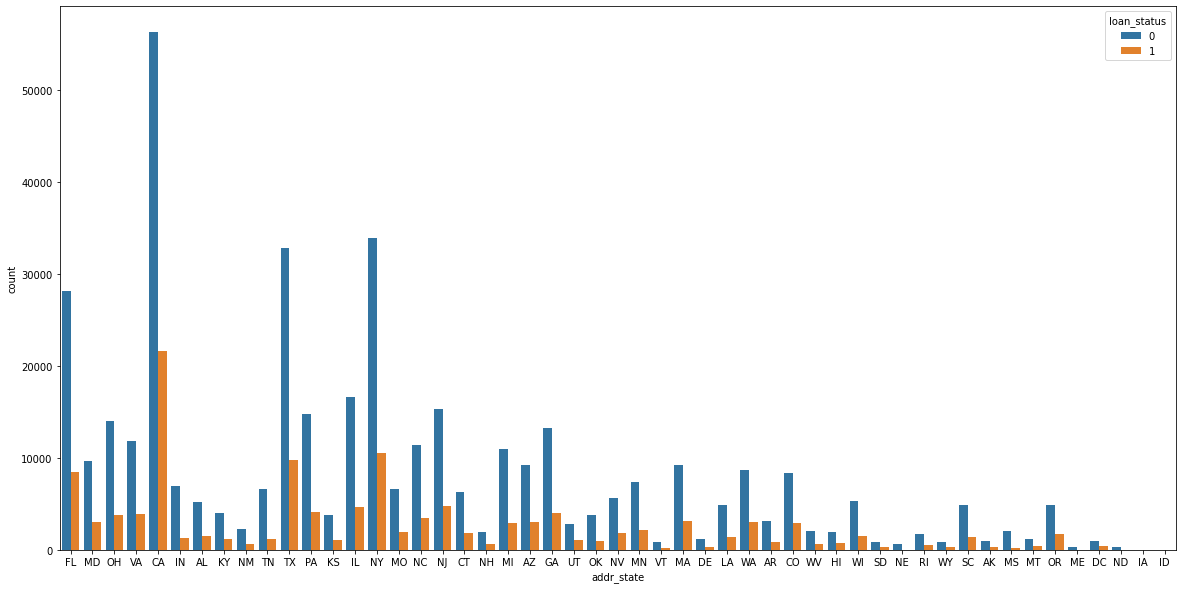

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x=data['addr_state'],hue=data['loan_status'],saturation=0.75,ax=ax)

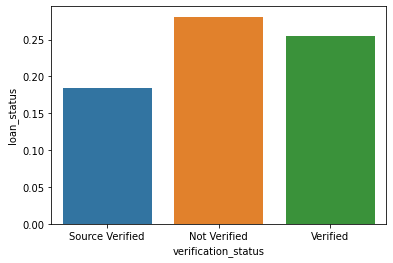

In [ ]:
# fig, ax = plt.subplots(figsize=(20,10/))
sns.barplot(x=data['verification_status'],y=data['loan_status'],ci=None)

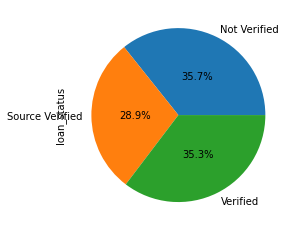

In [ ]:
data1 = data.groupby('verification_status')['loan_status'].sum()
data1.plot.pie(autopct="%.1f%%", pctdistance=0.5)

* The bank has a large number of clients that are not verified before sanctioning of a loan

In [ ]:
new=data.groupby('verification_status')['loan_status']
new.value_counts()

verification_status  loan_status
Not Verified         0              115028
                     1               44948
Source Verified      0              161329
                     1               36421
Verified             0              130244
                     1               44458
Name: loan_status, dtype: int64

* This shows that clients that are not verified are more likely to be 
defaulters 

#Missing Value Analysis


In [6]:
###Dropping Columns and Rows
threshold = 50
#Dropping columns with missing value rate higher than threshold
cols = data.columns[(100 * data.isnull().sum() / len(data)).round(2) > threshold]
data.drop(columns=cols,inplace=True)
data.shape

(532428, 40)

In [8]:
data.columns[data.isnull().sum()>0]

Index(['batch_enrolled', 'emp_title', 'emp_length', 'annual_inc', 'title',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

#**Imputation using mean**
Using a Traditional split, compute and merge trick - To save processing time of DataFrame. Can also be done with some new alogs - yet takes time to set the system configurations. So, sticking traditional.

In [9]:
data = data.sample(frac=1)

data_split_1 = data[:100000]
data_split_2 = data[100000:200000]
data_split_3 = data[200000:300000]
data_split_4 = data[300000:400000]
data_split_5 = data[400000:]

In [10]:
data_split_1.fillna(data_split_1.mean(), inplace=True)
data_split_2.fillna(data_split_2.mean(), inplace=True)
data_split_3.fillna(data_split_3.mean(), inplace=True)
data_split_4.fillna(data_split_4.mean(), inplace=True)
data_split_5.fillna(data_split_5.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [11]:
print(data_split_1.shape)
print(data_split_2.shape)
print(data_split_3.shape)
print(data_split_4.shape)
print(data_split_5.shape)

(100000, 40)
(100000, 40)
(100000, 40)
(100000, 40)
(132428, 40)


In [12]:
#Merging the splitted dataframes to an aggreagated dataframe
data = pd.concat([data_split_1, data_split_2, data_split_3, data_split_4, data_split_5], ignore_index=True)
data.shape

(532428, 40)

In [13]:
#Dropping rows with Missing values - rows that are not feasible for imputation
data.dropna(inplace=True)

##**2. Outlier analysis**
We will plot a boxplot to observe the outliers in our data and clean the outliers for training as well as testing dat to avoid any kind of extreme variance in our data.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


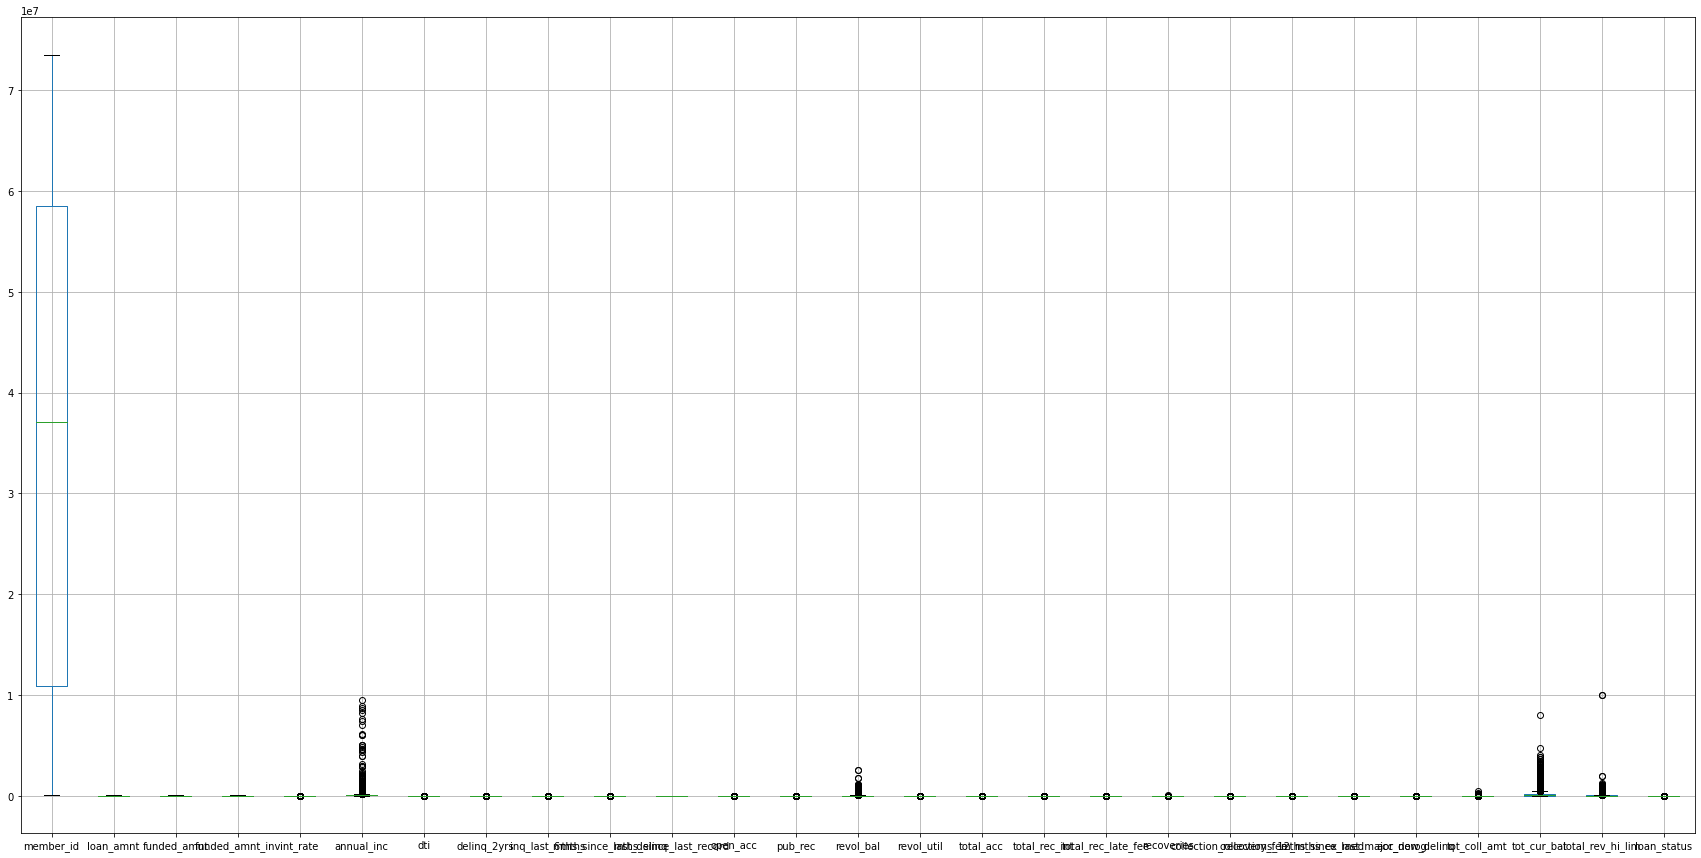

In [ ]:
data.boxplot(figsize=(30,15))
plt.show()

In [ ]:
cols = data.select_dtypes(include=[np.float]).columns
for n in cols:
  q1=data[n].quantile(.25)
  q3=data[n].quantile(.75)
  iqr=q3-q1
  data[n]=np.clip(data[n],q1-1.5*iqr,q3+1.5*iqr)


#Corelation  Analysis


In [14]:
def remove_collinear_features(x, threshold):
    
    # Dont want to remove correlations between loan_status
    y = x['loan_status']
    x = x.drop(columns = ['loan_status'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back to the data
    x['loan_status'] = y
               
    return x

In [15]:
data=remove_collinear_features(data,0.6)
test_cols=data.columns

In [16]:
#Correlations between Features and Target

#Find all correlations and sort
correlations_df = data.corr()['loan_status'].sort_values()

# #Print the most negative correlations
print(correlations_df.head(15), '\n')

# #Print the most positive correlations
print(correlations_df.tail(15))


member_id                    -0.491792
dti                          -0.131372
funded_amnt                  -0.102702
loan_amnt                    -0.100810
open_acc                     -0.067076
recoveries                   -0.062137
pub_rec                      -0.047581
delinq_2yrs                  -0.047094
revol_util                   -0.046795
revol_bal                    -0.043415
collection_recovery_fee      -0.042931
collections_12_mths_ex_med   -0.034023
acc_now_delinq               -0.015419
annual_inc                   -0.013819
tot_coll_amt                 -0.011773
Name: loan_status, dtype: float64 

pub_rec                      -0.047581
delinq_2yrs                  -0.047094
revol_util                   -0.046795
revol_bal                    -0.043415
collection_recovery_fee      -0.042931
collections_12_mths_ex_med   -0.034023
acc_now_delinq               -0.015419
annual_inc                   -0.013819
tot_coll_amt                 -0.011773
total_rec_late_fee          

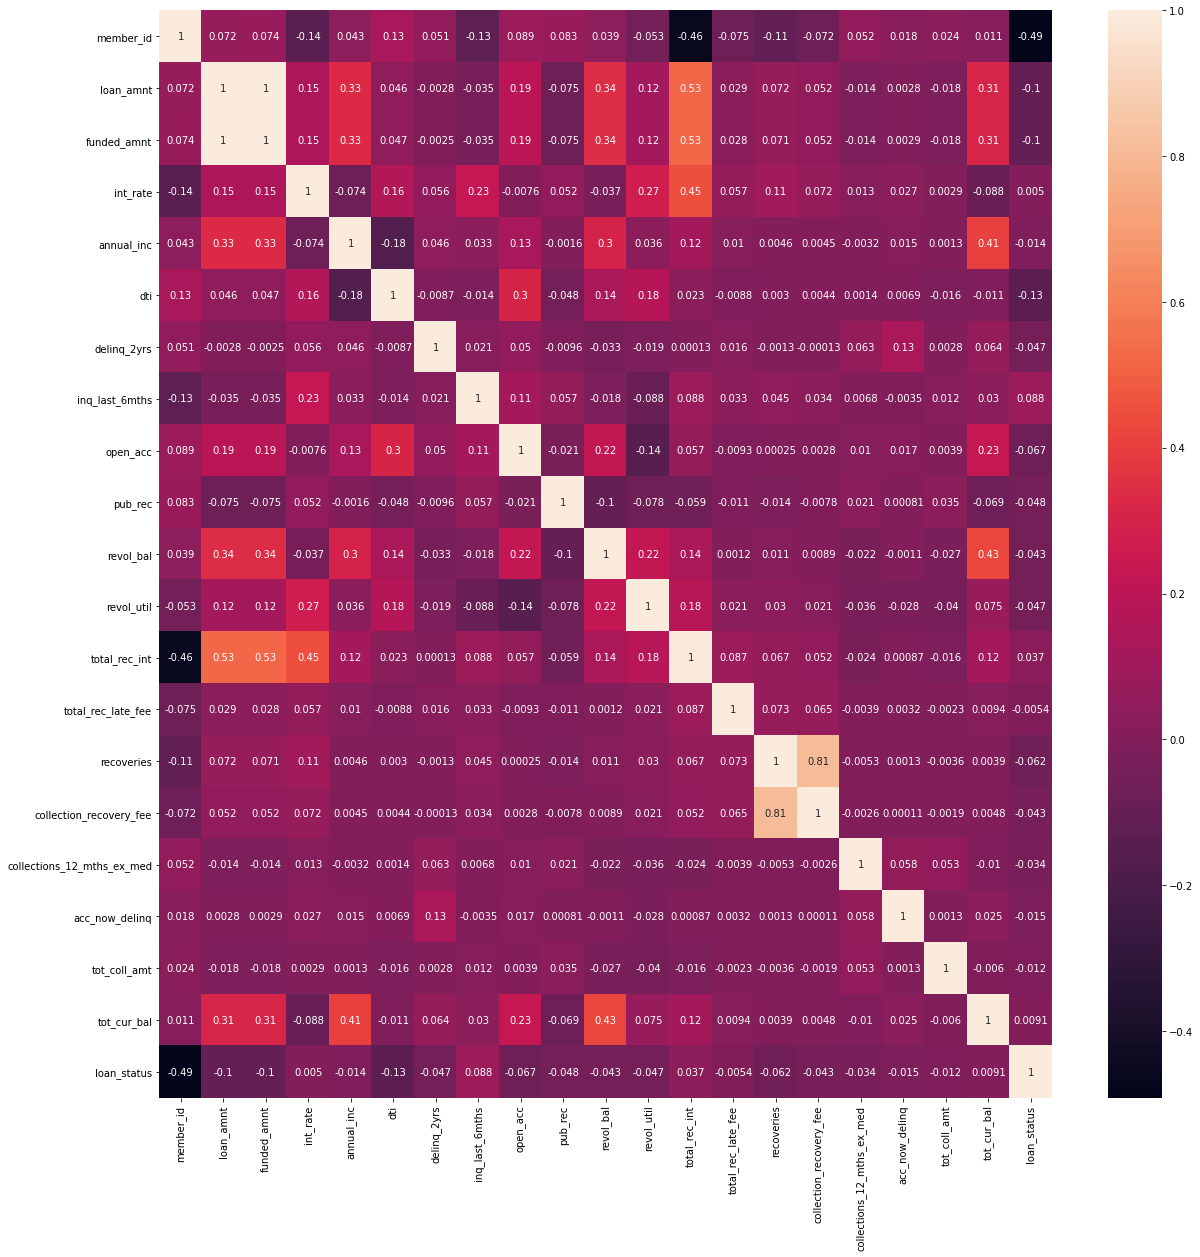

In [17]:
fig,ax=plt.subplots(figsize=(20,20))
correlation = data.corr()
sns.heatmap(correlation,xticklabels=True,yticklabels=True,ax=ax,annot=True)

#**Split in training and testing**

In [18]:
#splitting the given data in training and test to check on knowm
new = data.select_dtypes(include=[np.object]).columns
thres=10
for n in new:
  if (data[n].nunique()) < thres:
    data = pd.get_dummies(data,columns=[n],drop_first=True)


data.drop(columns=(data.select_dtypes(include=[np.object]).columns),inplace=True)

In [19]:
from sklearn.model_selection import train_test_split

#Separate out the features and targets
features = data.drop(columns='loan_status')
targets = pd.DataFrame(data['loan_status'])

#Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(336956, 37)
(84240, 37)
(336956, 1)
(84240, 1)


In [20]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
#Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [22]:
from sklearn.svm import SVC
#metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

#Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
classifier.fit(X_train,y_train)
y_pred_lr = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred_lr)
prec = precision_score(y_test, y_pred_lr,average='weighted')
rec = recall_score(y_test, y_pred_lr,average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')
roc_auc= roc_auc_score(y_test, y_pred_lr)
results = pd.DataFrame([['Logistic Regression', acc,prec, rec, f1,roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision','Recall', 'F1 Score','ROC_AUC'])

# results = results.append(model_results, ignore_index = True)
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score  ROC_AUC
0  Logistic Regression  0.854107   0.849145  0.854107  0.850655  0.77804


#Decision Tree


In [25]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=14) 
# training the classifier
clf.fit(X_train,y_train)
# do our predictions on the test
pred_dt = clf.predict(X_test)
# Predicting Test Set

acc = accuracy_score(y_test, pred_dt)
prec = precision_score(y_test, pred_dt,average='weighted')
rec = recall_score(y_test, pred_dt,average='weighted')
f1 = f1_score(y_test, pred_dt, average='weighted')
roc_auc= roc_auc_score(y_test, pred_dt)
model_results = pd.DataFrame([['Decision Tree', acc,prec, rec, f1,roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision','Recall', 'F1 Score','ROC_AUC'])

results = results.append(model_results, ignore_index = True)
print(results)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC_AUC
0  Logistic Regression  0.854107   0.849145  0.854107  0.850655  0.778040
1        Decision Tree  0.870240   0.870583  0.870240  0.870408  0.822922


#Random Forest Classifier


In [26]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train)

# Predicting Test Set
y_pred_rf = clf_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf,average='weighted')
rec = recall_score(y_test, y_pred_rf,average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')
roc_auc= roc_auc_score(y_test, y_pred_rf)
model_results = pd.DataFrame([['Random forest classifier', acc,prec, rec, f1,roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision','Recall', 'F1 Score','ROC_AUC'])

results = results.append(model_results, ignore_index = True)
print(results)




                      Model  Accuracy  Precision    Recall  F1 Score   ROC_AUC
0       Logistic Regression  0.854107   0.849145  0.854107  0.850655  0.778040
1             Decision Tree  0.870240   0.870583  0.870240  0.870408  0.822922
2  Random forest classifier  0.888877   0.888535  0.888877  0.881413  0.794903


#Ada Boost with RFC

In [27]:
from sklearn.ensemble import AdaBoostClassifier
clf=RandomForestClassifier()
abc = AdaBoostClassifier(base_estimator=clf,n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_abc = model.predict(X_test)

acc = accuracy_score(y_test, y_pred_abc)
prec = precision_score(y_test, y_pred_abc,average='weighted')
rec = recall_score(y_test, y_pred_abc,average='weighted')
f1 = f1_score(y_test, y_pred_abc, average='weighted')
roc_auc= roc_auc_score(y_test, y_pred_abc)
model_results = pd.DataFrame([['Adaboost ', acc,prec, rec, f1,roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision','Recall', 'F1 Score','ROC_AUC'])

results = results.append(model_results, ignore_index = True)
print(results)




KeyboardInterrupt: ignored

#XG Boost


In [28]:
import xgboost as xgb
model =xgb.XGBClassifier(learning_rate=0.06,colsample_bytree = 0.6, subsample = 0.8,n_estimators=200,max_depth=3, gamma=0)
model.fit(X_train,y_train)
y_pred_xg = model.predict(X_test)

acc = accuracy_score(y_test, y_pred_xg)
prec = precision_score(y_test, y_pred_xg,average='weighted')
rec = recall_score(y_test, y_pred_xg,average='weighted')
f1 = f1_score(y_test, y_pred_xg, average='weighted')
roc_auc= roc_auc_score(y_test, y_pred_xg)
model_results = pd.DataFrame([['XG Boost', acc,prec, rec, f1,roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision','Recall', 'F1 Score','ROC_AUC'])

results = results.append(model_results, ignore_index = True)
print(results)


                      Model  Accuracy  Precision    Recall  F1 Score   ROC_AUC
0       Logistic Regression  0.854107   0.849145  0.854107  0.850655  0.778040
1             Decision Tree  0.870240   0.870583  0.870240  0.870408  0.822922
2  Random forest classifier  0.888877   0.888535  0.888877  0.881413  0.794903
3                  XG Boost  0.877671   0.876721  0.877671  0.868372  0.774147


#Bernoullie Naive Bayes

In [29]:
from sklearn.naive_bayes import BernoulliNB
model_bnb = BernoulliNB()
model_bnb.fit(X_train,y_train)
# Predicting Test Set
pred_bnb = model_bnb.predict(X_test)

acc = accuracy_score(y_test, pred_bnb)
prec = precision_score(y_test, pred_bnb,average='weighted')
rec = recall_score(y_test, pred_bnb,average='weighted')
f1 = f1_score(y_test, pred_bnb, average='weighted')
roc_auc= roc_auc_score(y_test, pred_bnb)
model_results = pd.DataFrame([['Bernouillie Naive Bayes', acc,prec, rec, f1,roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision','Recall', 'F1 Score','ROC_AUC'])

results = results.append(model_results, ignore_index = True)
print(results)

                      Model  Accuracy  Precision    Recall  F1 Score   ROC_AUC
0       Logistic Regression  0.854107   0.849145  0.854107  0.850655  0.778040
1             Decision Tree  0.870240   0.870583  0.870240  0.870408  0.822922
2  Random forest classifier  0.888877   0.888535  0.888877  0.881413  0.794903
3                  XG Boost  0.877671   0.876721  0.877671  0.868372  0.774147
4   Bernouillie Naive Bayes  0.793245   0.790192  0.793245  0.791619  0.708184


In [30]:
result=pd.DataFrame(results)
result

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Logistic Regression,0.854107,0.849145,0.854107,0.850655,0.778040
1,Decision Tree,0.870240,0.870583,0.870240,0.870408,0.822922
2,Random forest classifier,0.888877,0.888535,0.888877,0.881413,0.794903
3,XG Boost,0.877671,0.876721,0.877671,0.868372,0.774147
4,Bernouillie Naive Bayes,0.793245,0.790192,0.793245,0.791619,0.708184


#Best Accuracy

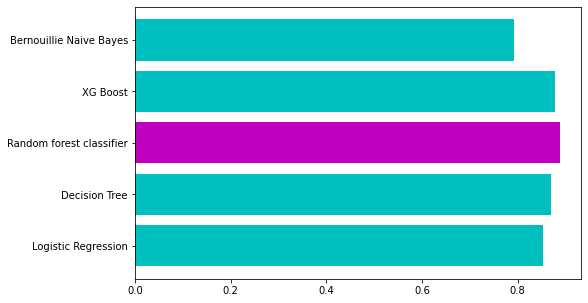

In [31]:
plt.figure(figsize=(8,5))
max_acc_index=results.Accuracy[results.Accuracy==results.Accuracy.max()].index[0]
plt.barh(results.Model,results.Accuracy,color='c')
plt.barh(results.Model[max_acc_index],results.Accuracy[max_acc_index],color='m')
plt.show()

#best precision

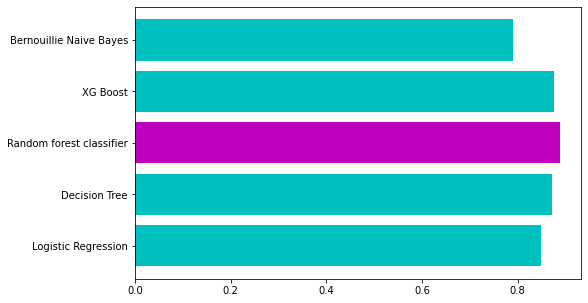

In [32]:
plt.figure(figsize=(8,5))
max_pre_index=results.Precision[results.Precision==results.Precision.max()].index[0]
plt.barh(results.Model,results.Precision,color='c')
plt.barh(results.Model[max_pre_index],results.Precision[max_pre_index],color='m')
plt.show()

#Best Recall

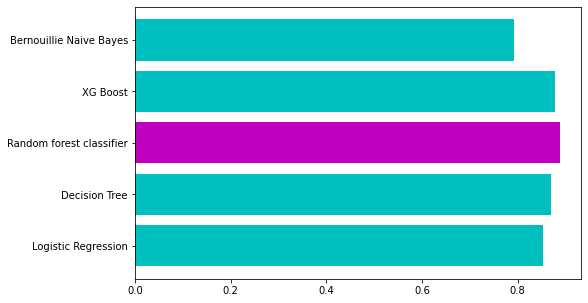

In [33]:
plt.figure(figsize=(8,5))
max_rc_index=results.Recall[results.Recall==results.Recall.max()].index[0]
plt.barh(results.Model,results.Recall,color='c')
plt.barh(results.Model[max_rc_index],results.Recall[max_rc_index],color='m')
plt.show()

#best F1 score

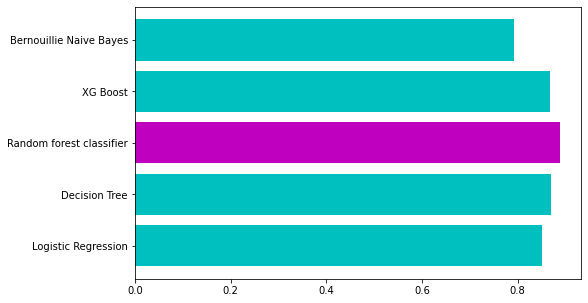

In [34]:
plt.figure(figsize=(8,5))
max_f1_index=results['F1 Score'][results['F1 Score']==results['F1 Score'].max()].index[0]
plt.barh(results.Model,results['F1 Score'],color='c')
plt.barh(results.Model[max_f1_index],results.Accuracy[max_f1_index],color='m')
plt.show()

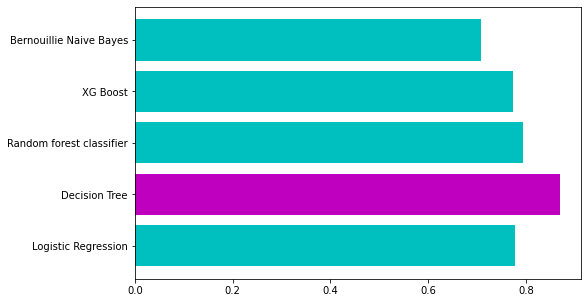

In [35]:
plt.figure(figsize=(8,5))
max_f1_index=results['ROC_AUC'][results['ROC_AUC']==results['ROC_AUC'].max()].index[0]
plt.barh(results.Model,results['ROC_AUC'],color='c')
plt.barh(results.Model[max_f1_index],results.Accuracy[max_f1_index],color='m')
plt.show()

#Checking on the actual test data 

###Missing Value Analysis

In [36]:
test.shape

(354951, 44)

In [37]:
#including the same columns from the train data after eliminating the missing value columns
test=test[['member_id', 'loan_amnt', 'funded_amnt', 'term', 'batch_enrolled',
       'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'application_type', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal']]
       

In [38]:
#splittting the test data to fill NAN values

test = test.sample(frac=1)
test_split_1 = test[:100000]
test_split_2 = test[100000:200000]
test_split_3 = test[200000:300000]
test_split_4 = test[300000:]
# data_split_5 = data[400000:]

In [39]:
test_split_1.fillna(test_split_1.mean(), inplace=True)
test_split_2.fillna(test_split_2.mean(), inplace=True)
test_split_3.fillna(test_split_3.mean(), inplace=True)
test_split_4.fillna(test_split_4.mean(), inplace=True)
# data_split_5.fillna(data_split_5.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [40]:
test = pd.concat([test_split_1, test_split_2, test_split_3, test_split_4], ignore_index=True)

In [41]:
#Dropping rows with Missing values - rows that are not feasible for imputation
test.dropna(inplace=True)

#outlier Analysis

In [50]:
cols = data.select_dtypes(include=[np.float]).columns
for n in cols:
  q1=data[n].quantile(.25)
  q3=data[n].quantile(.75)
  iqr=q3-q1
  data[n]=np.clip(data[n],q1-1.5*iqr,q3+1.5*iqr)


CHecking categorical variable

In [42]:
new = test.select_dtypes(include=[np.object]).columns
thres=10
for n in new:
  if (test[n].nunique()) < thres:
    test = pd.get_dummies(test,columns=[n],drop_first=True)

In [43]:
test.drop(columns=(test.select_dtypes(include=[np.object]).columns),inplace=True)

In [51]:
test.shape

(291273, 36)

Scaling our data

In [52]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# _train = sc.fit_transform(X_train)
x_test = sc.fit_transform(test)

In [53]:
#y_test=test['loan_status'] for prediction 
y_test = np.array(y_test).reshape((-1, ))

#Let's fit our data and use two models with best scores

RANDOM FOREST CLASSIFIER

                      Model  Accuracy  Precision    Recall  F1 Score   ROC_AUC
0       Logistic Regression  0.854107   0.849145  0.854107  0.850655  0.778040
1             Decision Tree  0.870240   0.870583  0.870240  0.870408  0.822922
2  Random forest classifier  0.888877   0.888535  0.888877  0.881413  0.794903
3                  XG Boost  0.877671   0.876721  0.877671  0.868372  0.774147
4   Bernouillie Naive Bayes  0.793245   0.790192  0.793245  0.791619  0.708184
5  Random forest classifier  0.888141   0.887946  0.888141  0.880448  0.792903


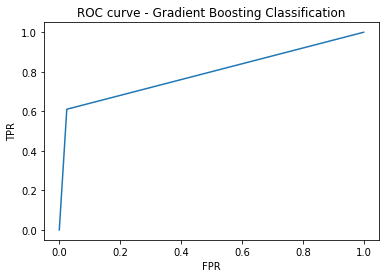

In [48]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train)

# Predicting Test Set
y_pred_rf = clf_rf.predict(x_test)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf,average='weighted')
rec = recall_score(y_test, y_pred_rf,average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')
roc_auc= roc_auc_score(y_test, y_pred_rf)
model_results = pd.DataFrame([['Random forest classifier', acc,prec, rec, f1,roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision','Recall', 'F1 Score','ROC_AUC'])

results = results.append(model_results, ignore_index = True)
print(results)

fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve - Gradient Boosting Classification')
plt.show()



DECISION TREE

                      Model  Accuracy  Precision    Recall  F1 Score   ROC_AUC
0       Logistic Regression  0.854107   0.849145  0.854107  0.850655  0.778040
1             Decision Tree  0.870240   0.870583  0.870240  0.870408  0.822922
2  Random forest classifier  0.888877   0.888535  0.888877  0.881413  0.794903
3                  XG Boost  0.877671   0.876721  0.877671  0.868372  0.774147
4   Bernouillie Naive Bayes  0.793245   0.790192  0.793245  0.791619  0.708184
5  Random forest classifier  0.888141   0.887946  0.888141  0.880448  0.792903
6             Decision Tree  0.870240   0.870583  0.870240  0.870408  0.822922


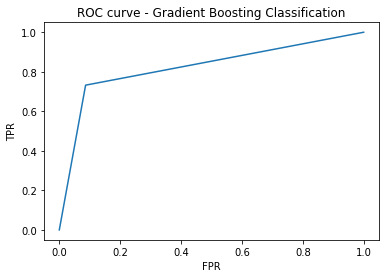

In [49]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=14) 
# training the classifier
clf.fit(X_train,y_train)
# do our predictions on the test
pred_dt = clf.predict(X_test)
# Predicting Test Set

acc = accuracy_score(y_test, pred_dt)
prec = precision_score(y_test, pred_dt,average='weighted')
rec = recall_score(y_test, pred_dt,average='weighted')
f1 = f1_score(y_test, pred_dt, average='weighted')
roc_auc= roc_auc_score(y_test, pred_dt)
model_results = pd.DataFrame([['Decision Tree', acc,prec, rec, f1,roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision','Recall', 'F1 Score','ROC_AUC'])

results = results.append(model_results, ignore_index = True)
print(results)


fpr, tpr, _ = roc_curve(y_test, pred_dt)
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve - Gradient Boosting Classification')
plt.show()


**Since Decision Tree Classifier has a better ROC score, using it's prediction for submission file**


#Getting the predictions

In [55]:
submission=pd.DataFrame(data=[test['member_id'],pred_dt],columns=['member_id','Predictions'],index=None)
submission.to_csv('/Submission.csv')
                        